In [1]:
import pandas as pd
from astropy.io import fits
import os
import matplotlib.pyplot as plt

In [2]:
DIR = 'e:\\Observations\\MMPP\\20201016\\J2218\\'
phot = pd.read_csv(DIR+'phot.csv', header=0)

In [3]:
os.chdir(DIR)
files = os.listdir(os.curdir) # search all files current directory
fitses = [file for file in files if file[-4:] == 'fits']

In [5]:
phot['angle'] = 0

In [6]:
for i in range(len(fitses)):
    hdu = fits.open(fitses[i])
    phot['angle'].iloc[i] = float(hdu[0].header['L4ANGLE'])

C:\ProgramData\Anaconda3\envs\Astro\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
p_m = phot['angle'] == -45
p_p = phot['angle'] == 45

In [22]:
phot.columns

Index(['T (JD)', 'Ref1', 'Obj1', 'Obj2', 'Obj3', 'Obj4', 'Obj5', 'Obj6',
       'angle'],
      dtype='object')

In [26]:
Q = (10**(phot.Obj5[p_m]-phot.Obj6[p_m])-1)/(10**(phot.Obj5[p_m]-phot.Obj6[p_m])+1)
U = (10**(phot.Obj5[p_p]-phot.Obj6[p_p])-1)/(10**(phot.Obj5[p_p]-phot.Obj6[p_p])+1)

In [27]:
Pv = [(Q.iloc[i]-U.iloc[i])*50 for i in range(len(Q))]
T = [(phot['T (JD)'].iloc[i]+phot['T (JD)'].iloc[i+1])/2-phot['T (JD)'].iloc[0] for i in range(0,len(fitses),2)]
M = (phot.Obj5+phot.Obj6)/2

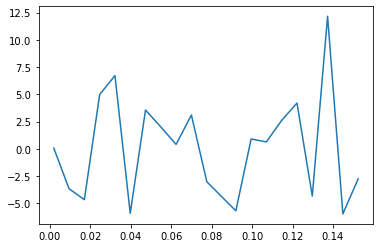

In [28]:
plt.plot(T, Pv)

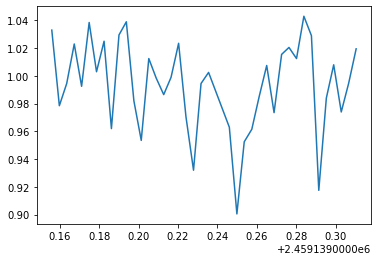

In [29]:
plt.plot(phot['T (JD)'], M)